# Analyse Exploratoire

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
from dataprep.eda import *
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'dataprep'

- Chargement du Jeux de Données

In [2]:
df = pd.read_csv('bank.csv',sep=';',na_values='Unknow')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df = df.drop('CLIENTNUM',axis=1)

In [8]:
df_quanti = df.select_dtypes(exclude=object)
df_quali = df.select_dtypes(include=object)

- Représentation Graphique des Variable

ValueError: num must be 1 <= num <= 14, not 15

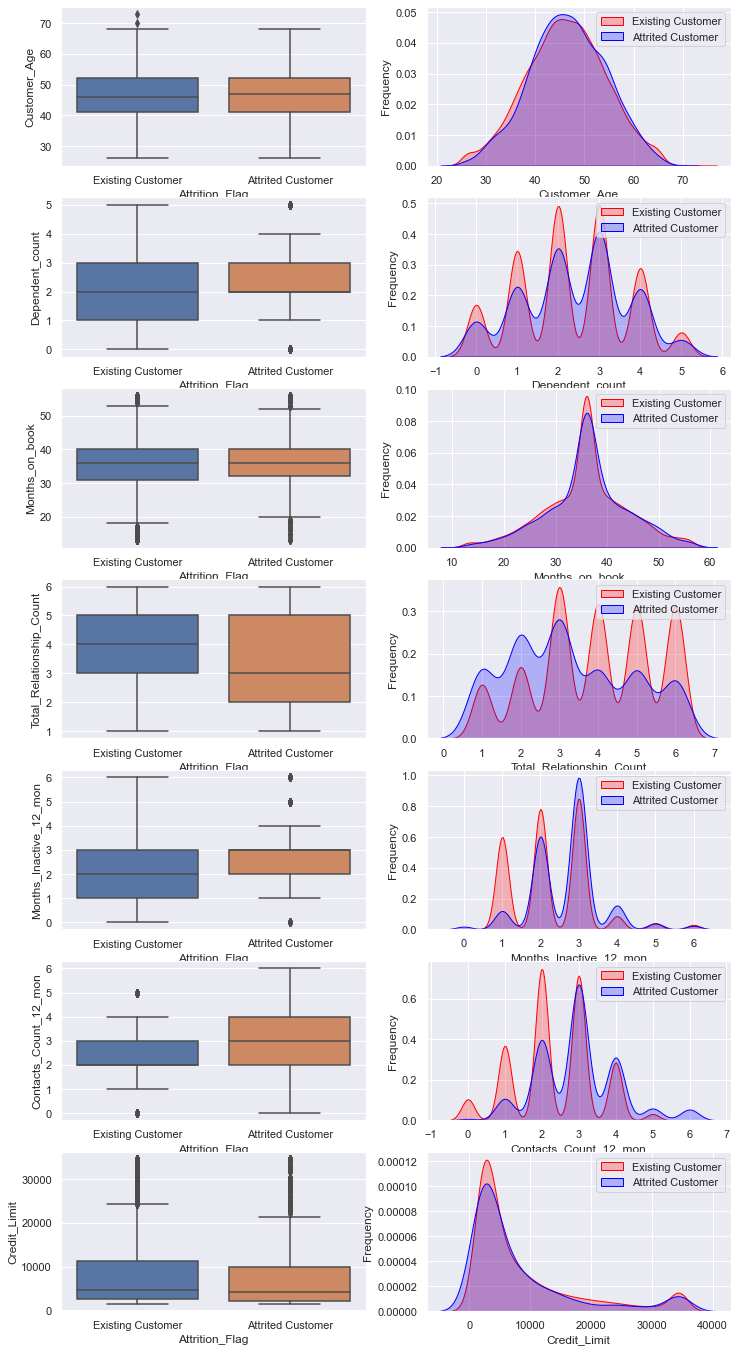

In [14]:
plt.figure(figsize=(12,24))
count = 1
for col in df_quanti.columns:
    plt.subplot(7, 2, count)
    sns.boxplot(x='Attrition_Flag', y= col, data= df)
    count +=1
    plt.subplot(7, 2, count)
    
    g = sns.kdeplot(df[col][(df["Attrition_Flag"] == 'Existing Customer') & (df[col].notnull())], color="Red", shade = True)
    g = sns.kdeplot(df[col][(df["Attrition_Flag"] == 'Attrited Customer') & (df[col].notnull())], ax =g, color="Blue", shade= True)
    g.set_xlabel(col)
    g.set_ylabel("Frequency")
    g = g.legend(["Existing Customer","Attrited Customer"])
    count+=1